<a href="https://colab.research.google.com/github/KaishvaShah/EE610_ImageProcessing/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

# Question 1

(868, 1156, 3)


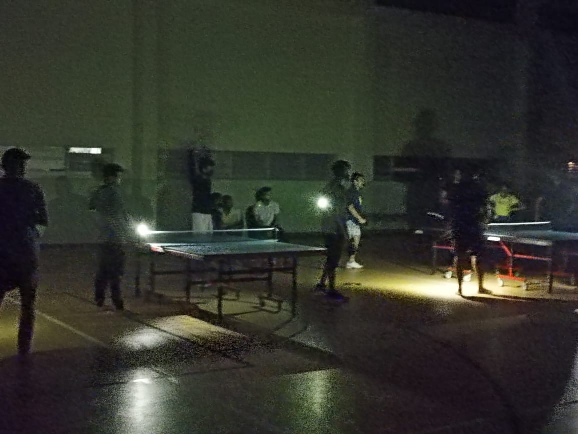

(434, 578, 3)


In [ ]:
img=cv2.imread('/content/Q1.jpeg')
print(img.shape)
img1 = cv2.resize(img, (578, 434),
               interpolation = cv2.INTER_NEAREST)
#https://www.geeksforgeeks.org/image-resizing-using-opencv-python/ used to resize the original image of (868, 1156, 3) to (434, 578, 3) using opencv
cv2_imshow(img1)
print(img1.shape)

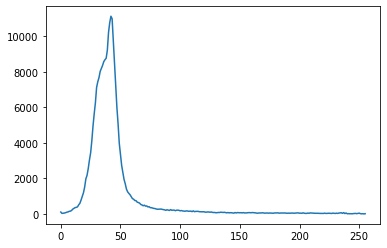

In [ ]:
from matplotlib import pyplot as plt
#cv2.calcHist(images, channels, mask, histSize, ranges)
hist = cv2.calcHist([img1],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
#Plotting the histograms for the black and white image

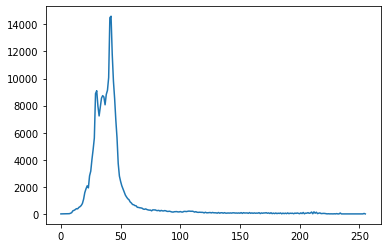

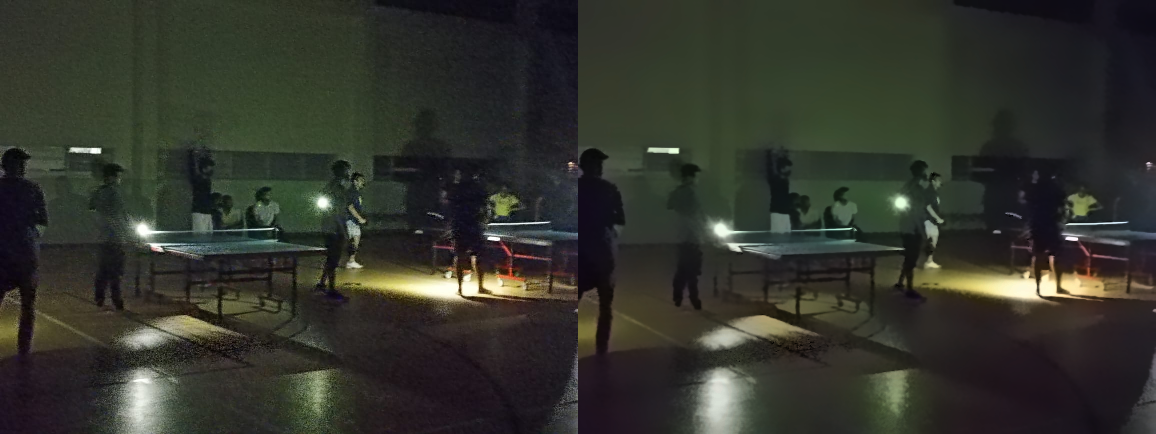

In [ ]:
denoised = cv2.fastNlMeansDenoisingColored(img1, None, 15, 15, 3, 21) 
#https://docs.opencv.org/3.4/d5/d69/tutorial_py_non_local_means.html to get a denoised image for gaussian noise.
hist = cv2.calcHist([denoised],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
horizontal_concat = np.concatenate((img1, denoised), axis=1)
cv2_imshow(horizontal_concat)

As you can see the image has a much better histogram as we have removed the noise (gaussian) to some extent.

In [ ]:
#from skimage import exposure
#ref = cv2.imread('/content/Q1_histogrammatch.jpg')
#multi = True if img.shape[-1] > 1 else False
#https://scikit-image.org/docs/stable/api/skimage.exposure.html
#skimage.exposure.match_histograms(image, reference, *, channel_axis=None, multichannel=False)
#matched = exposure.match_histograms(denoised, ref, multichannel=multi)
#print(matched)
#cv2_imshow(ref)
#cv2_imshow(matched)

# Question 2

(477, 320)


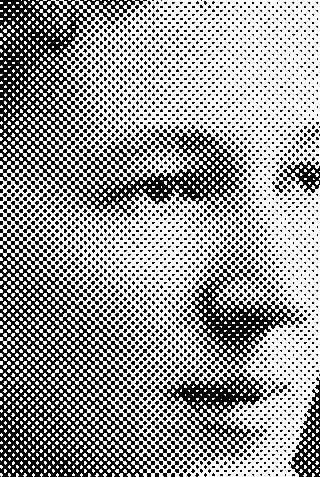

In [ ]:
img=cv2.imread('/content/Q2.jpg',0)
print(img.shape)
cv2_imshow(img)

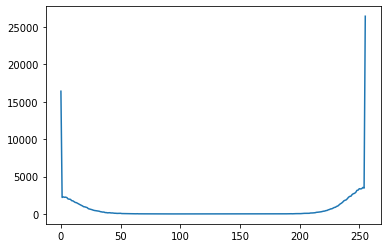

In [ ]:
#cv2.calcHist(images, channels, mask, histSize, ranges)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
#Plotting the histograms for the black and white image

(477, 320, 2)


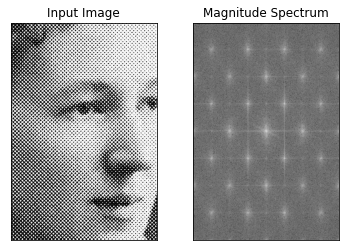

In [ ]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) 
#converting the image to the required type before applying cv2.dft on it.
#Gives 2 output channels. One is the real part and one is the imaginary part.
dft_shift = np.fft.fftshift(dft)
#To shift the zero-frequency component to the center of the spectrum.
print(dft_shift.shape)
#As discussed before, has size img,2 because it has 2 output channels, the real part and the imaginary part.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
#here we find the magnitude in decibel scale by giving 2 input channels, the real part and the imaginary part.
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

As we can see from the fourier transform of the image we have too many ink-dots that correspond to spots on the fourier transform image, we can actually take a low pass filter and see what that gives us.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


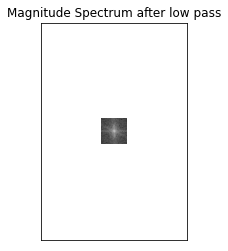

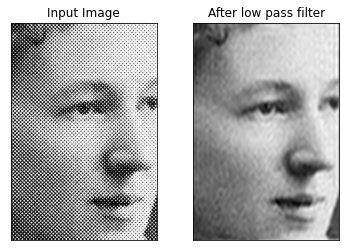

In [ ]:
rows, cols = img.shape
crow,ccol = int((rows+1)/2) ,int((cols)/2)

mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
#we are creating a mask of the same size of the image by giving it value 1 in the low frequency region and 0 in the high frequency region.
fshift = dft_shift*mask
#once multiplied we have essentially removed the high frequency elements in the frequency domain as seen in the fourier transform image.
magnitude_spectrum = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum after low pass'), plt.xticks([]), plt.yticks([])
plt.show()
#applying inverse fourier transform on the new fourier transform.
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back1 = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back1, cmap = 'gray')
plt.title('After low pass filter'), plt.xticks([]), plt.yticks([])
plt.show()

Clearly this photo is now much better because of the low pass filtering

# Question 3

<class 'numpy.ndarray'>
(551, 680, 3)


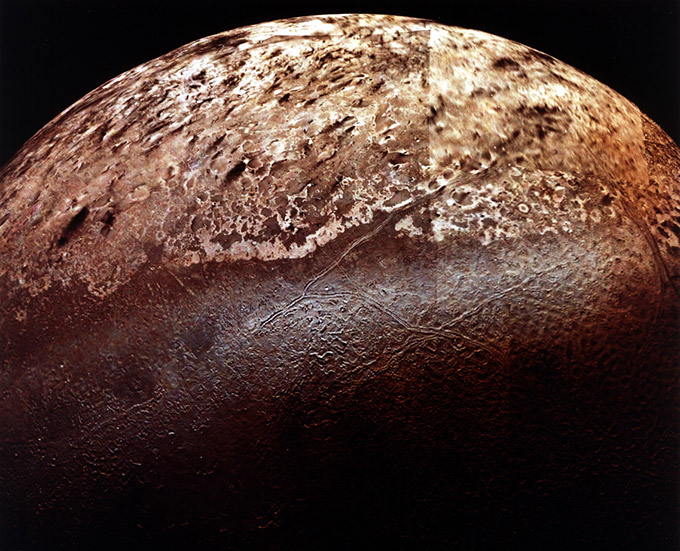

In [88]:
imgQ3=cv2.imread('/content/Q3.jpg')
print(type(imgQ3))
print(imgQ3.shape)
cv2_imshow(imgQ3)
imgbnw=cv2.imread('/content/Q3.jpg',0)

In [89]:
img1=imgQ3[:,:,0]
img2=imgQ3[:,:,1]
img3=imgQ3[:,:,2]

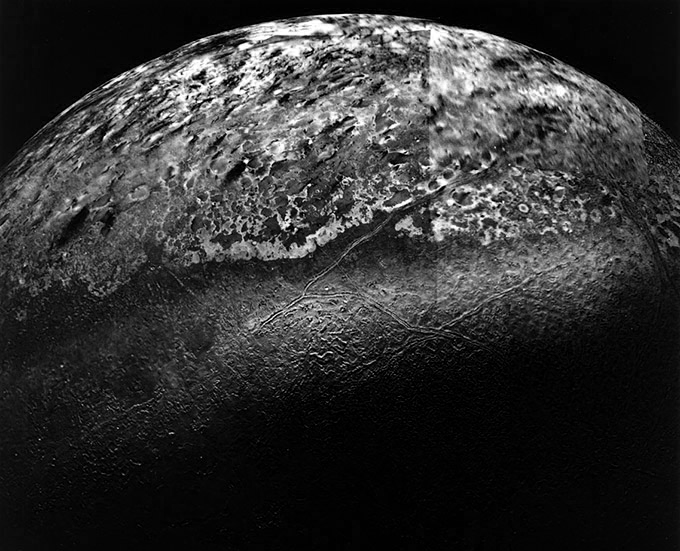

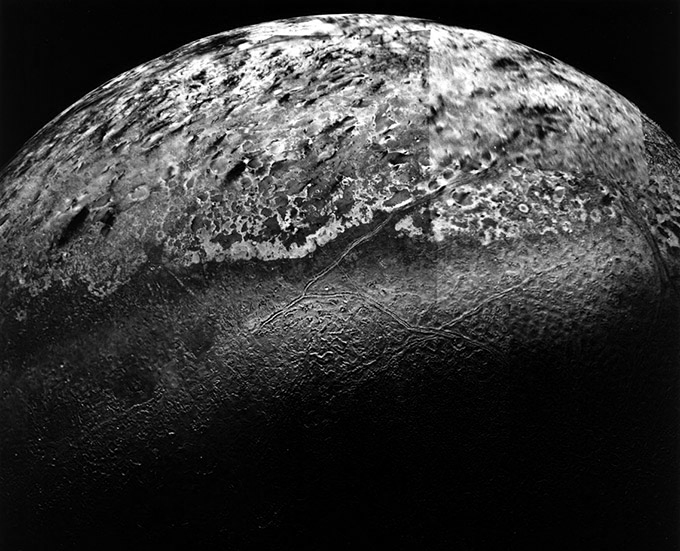

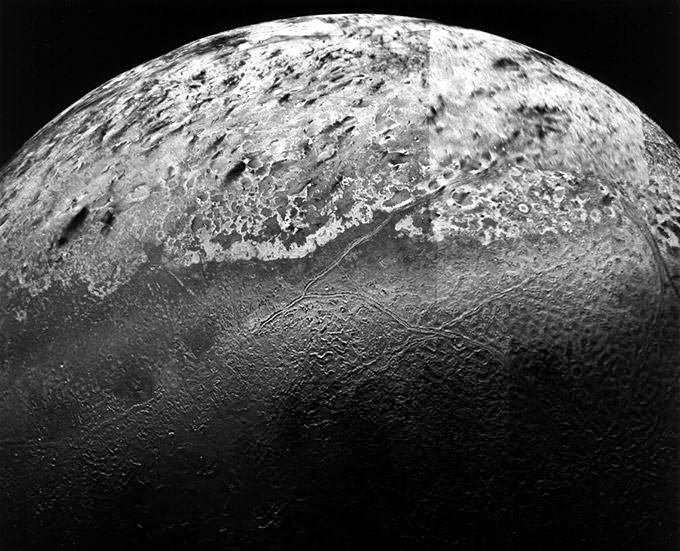

In [90]:
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)

In [91]:
def f_if(img):
  dft1 = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift1 = np.fft.fftshift(dft1)
  rows, cols = img.shape
  crow,ccol = int((rows+1)/2) ,int((cols)/2)

  mask = np.ones((rows,cols,2),np.uint8)
  mask[crow-6:crow+6, ccol-1200:ccol-20] = 0
  mask[crow-6:crow+6, ccol+20:ccol+1200] = 0
  #mask[crow-100:crow-40, ccol-6:ccol+6]=0
  #mask[crow+40:crow+100, ccol-6:ccol+6]=0

  #we are creating a mask of the same size of the image by giving it value 1 in the low frequency region and 0 in the high frequency region.
  fshift1 = dft_shift1*mask
  #once multiplied we have essentially removed the high frequency elements in the frequency domain as seen in the fourier transform image.
  magnitude_spectrum1 = 20*np.log(cv2.magnitude(fshift1[:,:,0],fshift1[:,:,1]))
  plt.subplot(122),plt.imshow(magnitude_spectrum1)
  plt.title('Magnitude Spectrum after low pass'), plt.xticks([]), plt.yticks([])
  plt.show()
  f_ishift1 = np.fft.ifftshift(fshift1)
  img_back = cv2.idft(f_ishift1)
  img_back_1 = (cv2.magnitude(img_back[:,:,0],img_back[:,:,1]))
  a=np.max(img_back_1)
  img_back_1=(img_back_1/a)*255
  print(img_back_1)
  #imgQ3[:,:,0]=img_back1
  plt.subplot(121),plt.imshow(img, cmap='gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  #plt.subplot(122),plt.imshow(img_back_1, cmap='gray')
  #plt.title('After masking'), plt.xticks([]), plt.yticks([])
  plt.show()
  cv2_imshow(img_back_1)
  return img_back_1
#applying inverse fourier transform on the new fourier transform.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


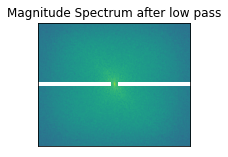

[[15.690374  14.738759  13.943387  ... 15.212433  15.795101  14.64018  ]
 [15.601336  14.658134  13.87394   ... 14.328274  14.917792  13.80014  ]
 [14.60965   14.579316  13.8056345 ... 13.44437   13.135127  12.961313 ]
 ...
 [12.347458  12.268525  12.34186   ...  9.704736  11.174153  11.728358 ]
 [11.354384  12.184804  12.27094   ... 13.354097  12.110557  10.887084 ]
 [10.362572  11.195616  12.20029   ... 13.37625   13.046817  11.85856  ]]


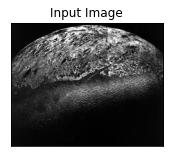

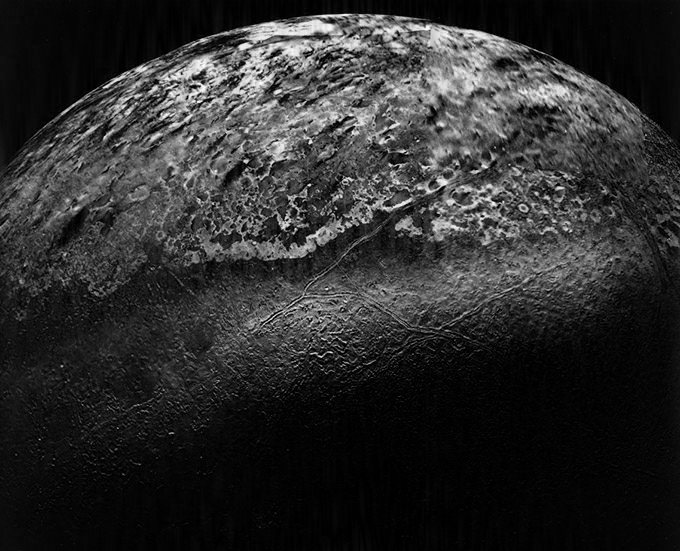

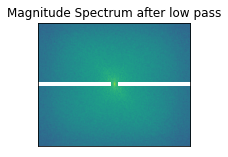

[[10.987085   9.926965   9.06999   ... 12.173195  12.704339  11.489273 ]
 [10.875116   9.82338    8.983263  ... 11.282301  11.823591  10.651858 ]
 [ 9.866658   9.721582   8.898029  ... 10.39239   10.037273   9.8183365]
 ...
 [ 7.7360888  7.525563   7.5195904 ...  6.6726503  8.084131   8.569028 ]
 [ 6.739031   7.4204288  7.4310713 ... 10.322506   9.017618   7.725529 ]
 [ 5.7519617  6.412606   7.3434806 ... 10.338514   9.952313   8.700392 ]]


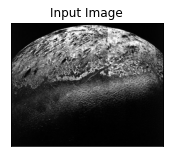

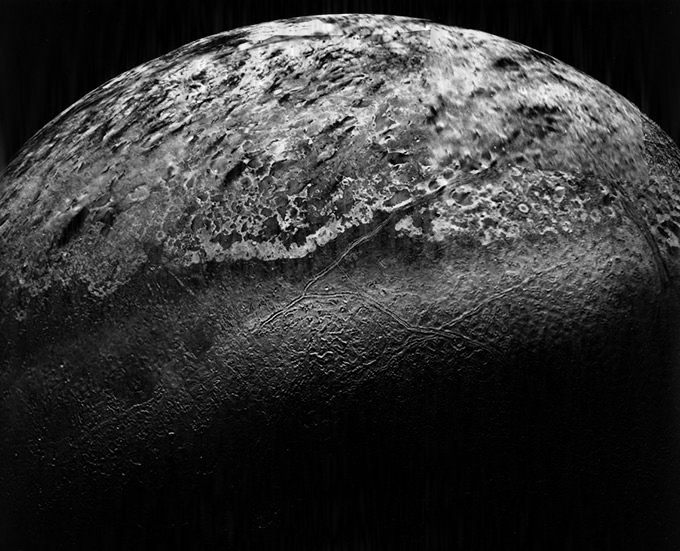

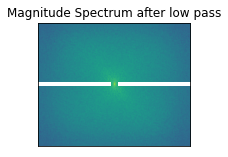

[[12.08634   11.040494  10.288767  ... 14.033279  14.271903  13.081559 ]
 [11.982742  10.939731  10.202462  ... 13.152072  13.418974  12.276903 ]
 [11.012642  10.841843  10.1188345 ... 12.269686  11.672559  11.475886 ]
 ...
 [ 8.922803   8.695356   8.772804  ...  8.584031   9.649043  10.12975  ]
 [ 7.975849   8.59307    8.682776  ... 12.198613  10.594218   9.324261 ]
 [ 7.0511336  7.616428   8.595313  ... 12.218695  11.537966  10.310378 ]]


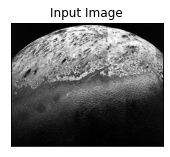

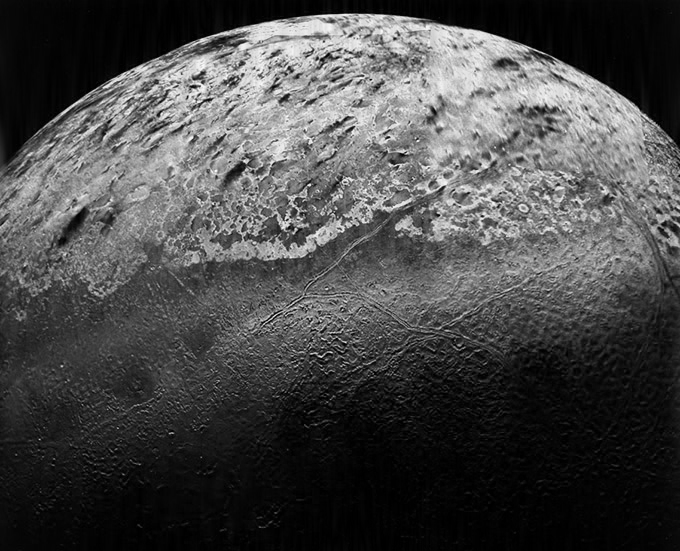

In [92]:
img_backr=f_if(img1/255)
img_backg=f_if(img2/255)
img_backb=f_if(img3/255)

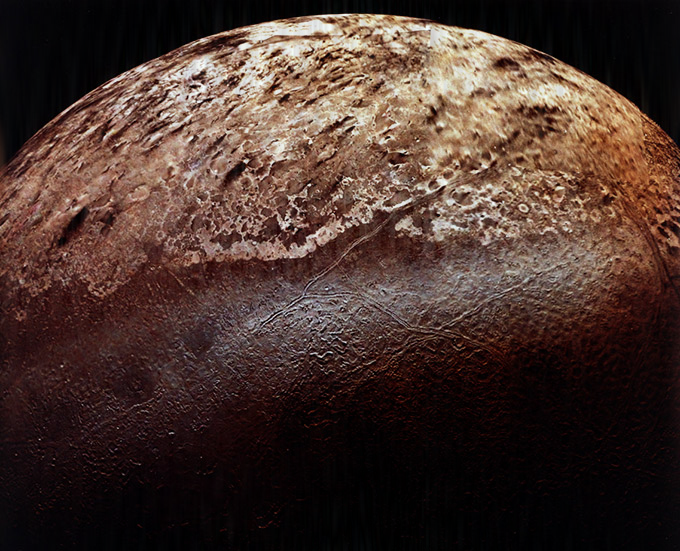

In [93]:
imgQ3[:,:,0]=img_backr
imgQ3[:,:,1]=img_backg
imgQ3[:,:,2]=img_backb
cv2_imshow(imgQ3)


# Question 3_1


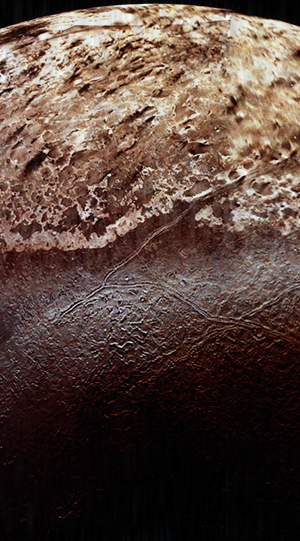

In [82]:
imgQ3_1 = imgQ3[10:,200:500]
cv2_imshow(imgQ3_1)

In [83]:
imgr1=imgQ3_1[:,:,0]
imgg1=imgQ3_1[:,:,1]
imgb1=imgQ3_1[:,:,2]

In [84]:
def f_if1(img):
  dft1 = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift1 = np.fft.fftshift(dft1)
  rows, cols = img.shape
  crow,ccol = int((rows+1)/2) ,int((cols)/2)

  mask = np.ones((rows,cols,2),np.uint8)
  mask[crow-6:crow+6, ccol-1200:ccol-20] = 0
  mask[crow-6:crow+6, ccol+20:ccol+1200] = 0
  mask[crow-1500:crow-20, ccol-6:ccol+6]=0
  mask[crow+20:crow+1500, ccol-6:ccol+6]=0

  #we are creating a mask of the same size of the image by giving it value 1 in the low frequency region and 0 in the high frequency region.
  fshift1 = dft_shift1*mask
  #once multiplied we have essentially removed the high frequency elements in the frequency domain as seen in the fourier transform image.
  magnitude_spectrum1 = 20*np.log(cv2.magnitude(fshift1[:,:,0],fshift1[:,:,1]))
  plt.subplot(122),plt.imshow(magnitude_spectrum1)
  plt.title('Magnitude Spectrum after low pass'), plt.xticks([]), plt.yticks([])
  plt.show()
  f_ishift1 = np.fft.ifftshift(fshift1)
  img_back = cv2.idft(f_ishift1)
  img_back_1 = (cv2.magnitude(img_back[:,:,0],img_back[:,:,1]))
  a=np.max(img_back_1)
  img_back_1=(img_back_1/a)*255
  print(img_back_1)
  #imgQ3[:,:,0]=img_back1
  plt.subplot(121),plt.imshow(img, cmap='gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  #plt.subplot(122),plt.imshow(img_back_1, cmap='gray')
  #plt.title('After masking'), plt.xticks([]), plt.yticks([])
  plt.show()
  cv2_imshow(img_back_1)
  return img_back_1
#applying inverse fourier transform on the new fourier transform.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


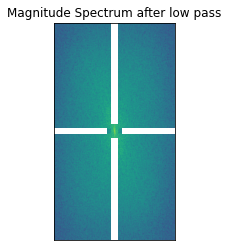

[[12.125698   9.268429   6.526719  ...  2.7814991  3.356082   4.9167485]
 [11.305003   8.455178   5.735542  ...  2.186424   4.1832337  5.957676 ]
 [ 9.920016   7.14035    4.548994  ...  3.0409799  5.884089   7.6653185]
 ...
 [15.13397   10.510919   6.8383226 ...  3.1281452  3.0051355  2.675591 ]
 [14.949341  10.339194   7.605214  ...  3.17977    2.618265   2.4101105]
 [15.350939   9.833973   7.116883  ...  2.444538   2.6754422  3.3610659]]


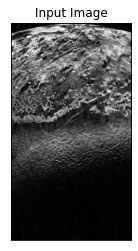

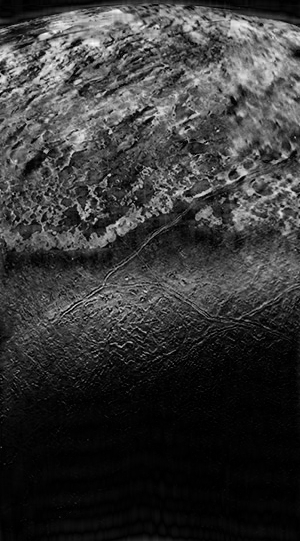

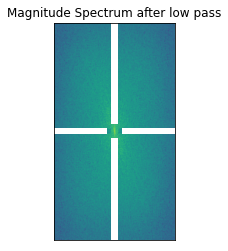

[[12.732861  10.306409   7.8010097 ...  2.5175457  2.280789   3.4884713]
 [11.937931   9.505723   7.0030923 ...  1.7731785  2.5543954  4.608152 ]
 [10.730296   8.316025   5.8479714 ...  2.1081848  3.8763635  5.3438215]
 ...
 [14.039112  11.784291   7.6888375 ...  3.5705805  2.9244416  2.761204 ]
 [14.732486  11.599688   9.231586  ...  3.56155    2.4152944  2.277536 ]
 [13.4988785 11.183029   8.781261  ...  2.7530808  2.2413096  2.1748412]]


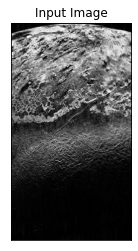

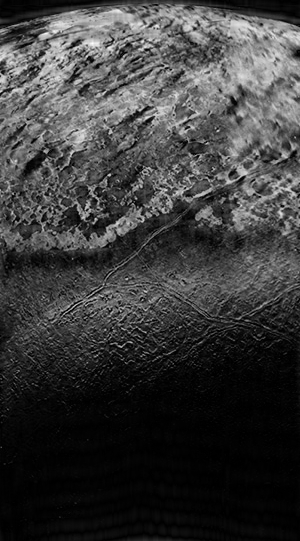

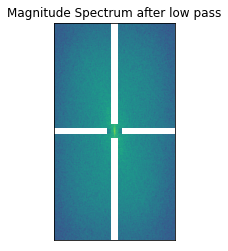

[[12.895827  10.260783   7.95869   ...  2.7850726  2.3609805  0.6359773]
 [11.7245655  9.050025   6.7181373 ...  1.4373859  1.2340511  1.7976391]
 [10.369818   7.6672945  5.3280525 ...  1.3313318  1.7073637  3.468044 ]
 ...
 [14.066055  10.704481   7.6443315 ...  4.820181   5.16851    4.548622 ]
 [14.111601  10.700276   8.508469  ...  5.075205   4.598287   4.047213 ]
 [14.516499  10.1513815  7.919438  ...  3.9071827  2.632293   2.1274116]]


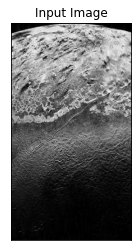

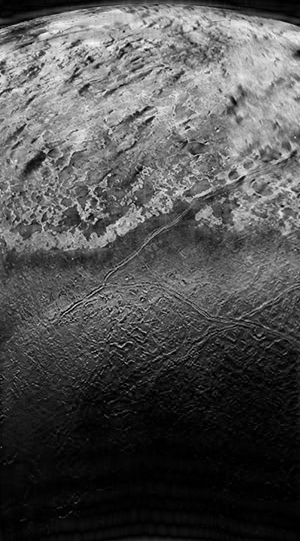

In [85]:
imgr11=f_if1(imgr1/255)
imgg11=f_if1(imgg1/255)
imgb11=f_if1(imgb1/255)

In [86]:
imgQ3_1[:,:,0]=imgr11
imgQ3_1[:,:,1]=imgg11
imgQ3_1[:,:,2]=imgb11
print(imgQ3_1.shape)

(541, 300, 3)


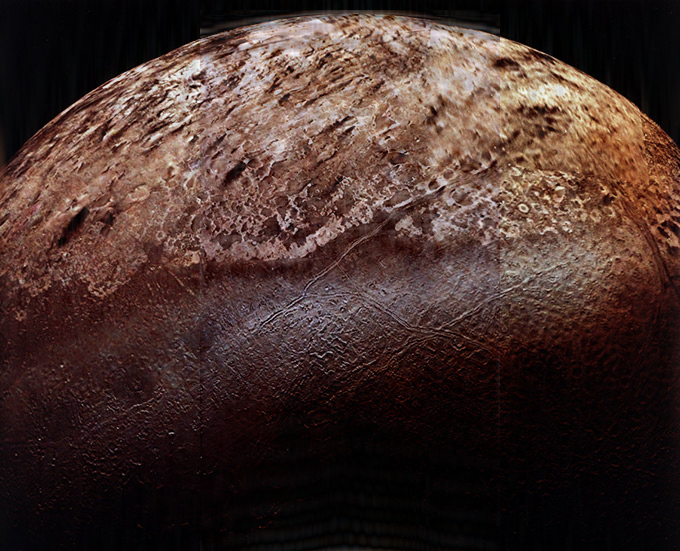

In [87]:
#imgQ3[:99,200:500]=imgQ3_1[1:,:]
#imgQ3[99:100,200:500]=imgQ3_1[:1,:]
imgQ3[10:,200:500]=imgQ3_1[:,:]
cv2_imshow(imgQ3)

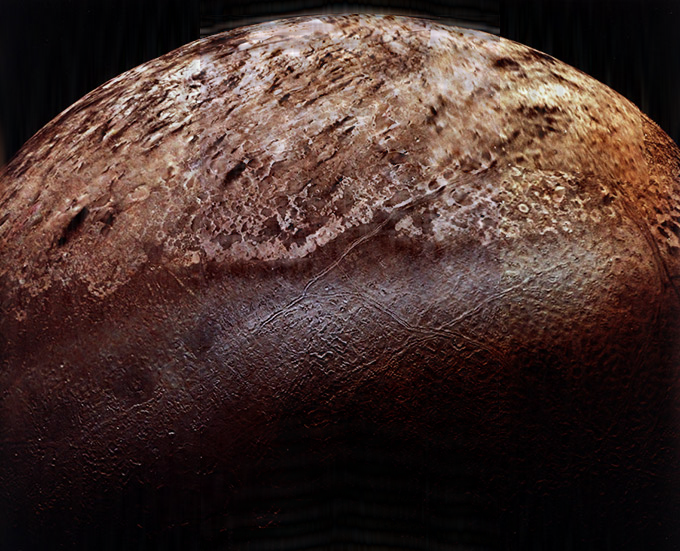

In [64]:
cv2_imshow(imgQ3)

# Question 4

<class 'numpy.ndarray'>
(852, 1445)


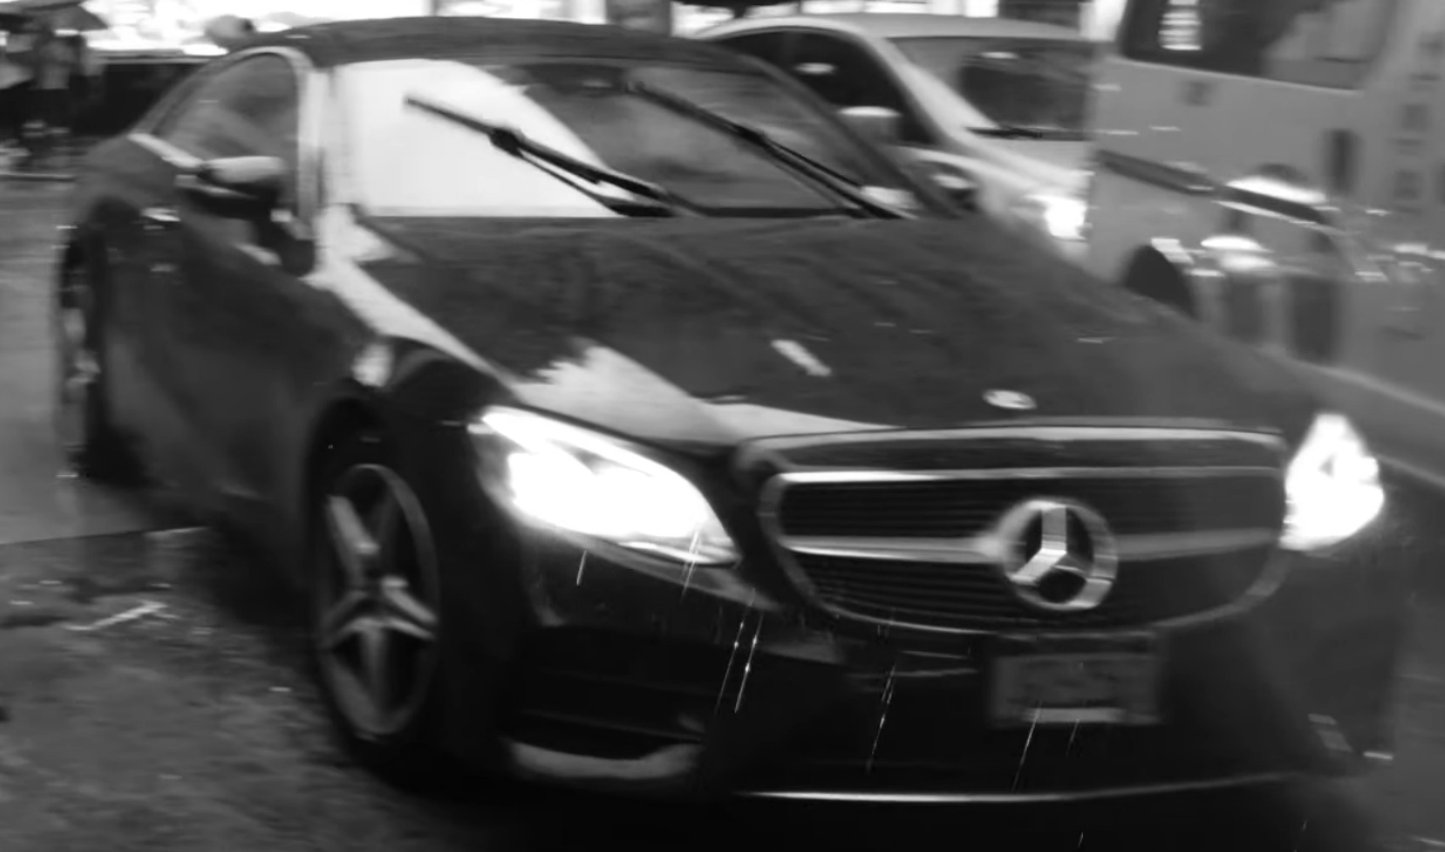

In [148]:
imgQ4=cv2.imread('/content/Q4.jpg',0)
print(type(imgQ4))
print(imgQ4.shape)
cv2_imshow(imgQ4)

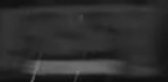

In [149]:
img_blur  = imgQ4[648:730,1000:1168]
cv2_imshow(img_blur)


In [168]:
#for psf we can do the following
p = imgQ4[542:563,1035:1070]

cv2_imshow(p)
p1 = cv2.dft(np.float32(p),flags = cv2.DFT_COMPLEX_OUTPUT)
print(p1.shape)
p11 = np.fft.fftshift(p1)
psf=cv2.magnitude(p11[:,:,0],p11[:,:,1])
a=cv2.phase(p11[:,:,0],p11[:,:,1])
cv2_imshow(a)
print(psf)
cv2_imshow(psf)

(21, 35, 2)


[[3.39162598e+01 3.67967796e+01 3.81010628e+01 3.24267120e+01
  4.80055351e+01 4.86561813e+01 4.61190910e+01 6.24211349e+01
  5.04744377e+01 4.60142517e+01 6.86977615e+01 4.76525421e+01
  4.38792534e+01 1.22208473e+02 2.12177246e+02 4.37225098e+02
  6.77617798e+02 4.16725677e+02 6.55420471e+02 4.74346863e+02
  2.23909012e+02 1.37692612e+02 2.85830116e+01 8.09810257e+01
  1.05560226e+02 6.74938660e+01 4.74360924e+01 6.97835159e+01
  3.32517929e+01 4.49980011e+01 4.79091492e+01 5.34619675e+01
  5.10610542e+01 3.63065872e+01 3.18575516e+01]
 [4.60335693e+01 4.80678902e+01 3.59606400e+01 4.76699181e+01
  4.73369217e+01 3.84711914e+01 3.32155991e+01 5.58631744e+01
  4.40766411e+01 9.05462570e+01 1.19675728e+02 5.39520607e+01
  3.25497742e+01 1.30153137e+02 1.66523941e+02 4.97560303e+02
  6.60340393e+02 5.08173218e+02 7.26308411e+02 4.36815063e+02
  3.30265198e+02 1.27325256e+02 4.03159752e+01 4.83435669e+01
  4.29810104e+01 5.72711182e+01 4.92103920e+01 5.64956093e+01
  4.35416794e+01 6.245

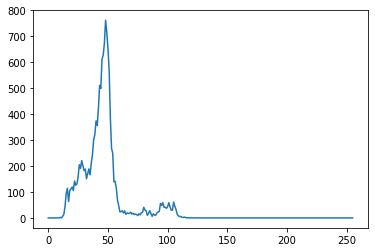

In [151]:
#cv2.calcHist(images, channels, mask, histSize, ranges)
hist = cv2.calcHist([img_blur],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
#Plotting the histograms for the black and white image

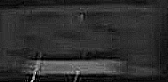

In [152]:
# Creating our sharpening filter
for i in range(1):
  filter1 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
  # Applying cv2.filter2D function on our Logo image
  sharpen_img_2=cv2.filter2D(img_blur,-1,filter1)
  cv2_imshow(sharpen_img_2)
  img_blur=sharpen_img_2
#sharpen_img_2=img_blur

In [153]:
def f(img):
  dft1 = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift1 = np.fft.fftshift(dft1)
  rows, cols = img.shape
  crow,ccol = int((rows+1)/2) ,int((cols)/2)

  mask = np.ones((rows,cols,2),np.uint8)
  #for i in range(80):
    #if(i<35 or i>70):
      #mask[i,int(4.5*i)-90]=0
  mask[:,ccol-82:ccol-10]=0
  mask[:,ccol+10:ccol+90]=0
  #cv2_imshow(mask)
  #we are creating a mask of the same size of the image by giving it value 1 in the low frequency region and 0 in the high frequency region.
  fshift1 = dft_shift1*mask
  #once multiplied we have essentially removed the high frequency elements in the frequency domain as seen in the fourier transform image.
  magnitude_spectrum1 = 20*np.log(cv2.magnitude(fshift1[:,:,0],fshift1[:,:,1]))
  plt.subplot(122),plt.imshow(magnitude_spectrum1)
  plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
  plt.show()
  f_ishift1 = np.fft.ifftshift(fshift1)
  img_back = cv2.idft(f_ishift1)
  img_back_1 = (cv2.magnitude(img_back[:,:,0],img_back[:,:,1]))
  a=np.max(img_back_1)
  img_back_1=(img_back_1/a)*255
  print(img_back_1)
  #imgQ3[:,:,0]=img_back1
  plt.subplot(121),plt.imshow(img, cmap='gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  #plt.subplot(122),plt.imshow(img_back_1, cmap='gray')
  #plt.title('After masking'), plt.xticks([]), plt.yticks([])
  plt.show()
  cv2_imshow(img_back_1)
  return img_back_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


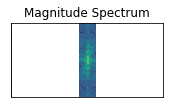

[[46.11184   42.67775   40.20987   ... 58.884827  54.482742  49.97267  ]
 [47.428658  41.61858   38.179703  ... 59.965244  56.85805   51.17802  ]
 [49.47943   43.006783  40.60129   ... 60.907635  58.622574  52.27896  ]
 ...
 [35.961334  32.94844   36.469326  ... 29.223768  33.922287  32.012127 ]
 [28.3872    33.869904  27.612371  ... 37.732704  30.828028  35.41757  ]
 [ 8.536252   6.8971424  3.378392  ... 24.94148   18.016766  14.977375 ]]


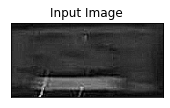

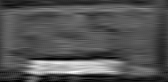

array([[46.11184  , 42.67775  , 40.20987  , ..., 58.884827 , 54.482742 ,
        49.97267  ],
       [47.428658 , 41.61858  , 38.179703 , ..., 59.965244 , 56.85805  ,
        51.17802  ],
       [49.47943  , 43.006783 , 40.60129  , ..., 60.907635 , 58.622574 ,
        52.27896  ],
       ...,
       [35.961334 , 32.94844  , 36.469326 , ..., 29.223768 , 33.922287 ,
        32.012127 ],
       [28.3872   , 33.869904 , 27.612371 , ..., 37.732704 , 30.828028 ,
        35.41757  ],
       [ 8.536252 ,  6.8971424,  3.378392 , ..., 24.94148  , 18.016766 ,
        14.977375 ]], dtype=float32)

In [154]:
f(img_blur)

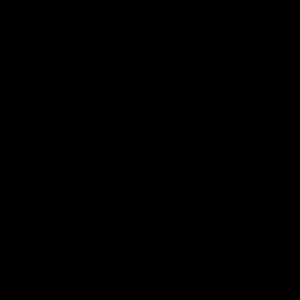

In [ ]:
psf = np.ones((300,300),np.uint8)
for i in range(300):
  psf[i,(i+1)%300]=0
psf=psf*255/76500
cv2_imshow(psf)

[[7.65852795 7.59793257 7.53890566 ... 8.33214744 8.09756993 7.87192375]
 [7.00815373 6.97018457 6.93394392 ... 7.64955751 7.42321756 7.20821325]
 [6.4554579  6.43710984 6.42094227 ... 7.06218096 6.8449736  6.64156791]
 ...
 [8.56714699 8.48291184 8.40042616 ... 9.16810011 8.96295827 8.76241054]
 [8.25456689 8.17780484 8.10280416 ... 8.88740984 8.67037955 8.45890756]
 [7.95053158 7.88153204 7.81427653 ... 8.60871383 8.38142323 8.16121654]]


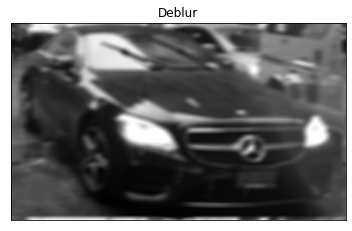

[[7.65852795 7.59793257 7.53890566 ... 8.33214744 8.09756993 7.87192375]
 [7.00815373 6.97018457 6.93394392 ... 7.64955751 7.42321756 7.20821325]
 [6.4554579  6.43710984 6.42094227 ... 7.06218096 6.8449736  6.64156791]
 ...
 [8.56714699 8.48291184 8.40042616 ... 9.16810011 8.96295827 8.76241054]
 [8.25456689 8.17780484 8.10280416 ... 8.88740984 8.67037955 8.45890756]
 [7.95053158 7.88153204 7.81427653 ... 8.60871383 8.38142323 8.16121654]]


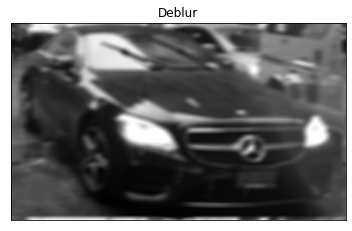

[[7.65852795 7.59793257 7.53890566 ... 8.33214744 8.09756993 7.87192375]
 [7.00815373 6.97018457 6.93394392 ... 7.64955751 7.42321756 7.20821325]
 [6.4554579  6.43710984 6.42094227 ... 7.06218096 6.8449736  6.64156791]
 ...
 [8.56714699 8.48291184 8.40042616 ... 9.16810011 8.96295827 8.76241054]
 [8.25456689 8.17780484 8.10280416 ... 8.88740984 8.67037955 8.45890756]
 [7.95053158 7.88153204 7.81427653 ... 8.60871383 8.38142323 8.16121654]]


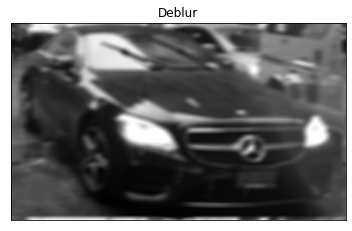

[[7.65852795 7.59793257 7.53890566 ... 8.33214744 8.09756993 7.87192375]
 [7.00815373 6.97018457 6.93394392 ... 7.64955751 7.42321756 7.20821325]
 [6.4554579  6.43710984 6.42094227 ... 7.06218096 6.8449736  6.64156791]
 ...
 [8.56714699 8.48291184 8.40042616 ... 9.16810011 8.96295827 8.76241054]
 [8.25456689 8.17780484 8.10280416 ... 8.88740984 8.67037955 8.45890756]
 [7.95053158 7.88153204 7.81427653 ... 8.60871383 8.38142323 8.16121654]]


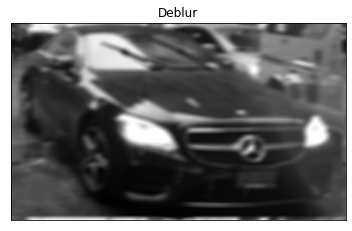

[[7.65852795 7.59793257 7.53890566 ... 8.33214744 8.09756993 7.87192375]
 [7.00815373 6.97018457 6.93394392 ... 7.64955751 7.42321756 7.20821325]
 [6.4554579  6.43710984 6.42094227 ... 7.06218096 6.8449736  6.64156791]
 ...
 [8.56714699 8.48291184 8.40042616 ... 9.16810011 8.96295827 8.76241054]
 [8.25456689 8.17780484 8.10280416 ... 8.88740984 8.67037955 8.45890756]
 [7.95053158 7.88153204 7.81427653 ... 8.60871383 8.38142323 8.16121654]]


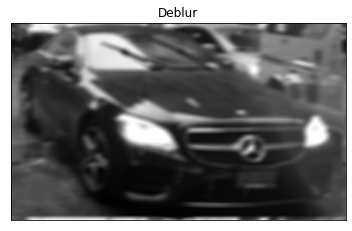

[[7.65852795 7.59793257 7.53890566 ... 8.33214744 8.09756993 7.87192375]
 [7.00815373 6.97018457 6.93394392 ... 7.64955751 7.42321756 7.20821325]
 [6.4554579  6.43710984 6.42094227 ... 7.06218096 6.8449736  6.64156791]
 ...
 [8.56714699 8.48291184 8.40042616 ... 9.16810011 8.96295827 8.76241054]
 [8.25456689 8.17780484 8.10280416 ... 8.88740984 8.67037955 8.45890756]
 [7.95053158 7.88153204 7.81427653 ... 8.60871383 8.38142323 8.16121654]]


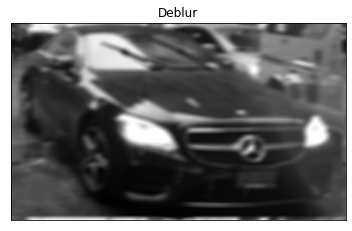

[[7.65852795 7.59793257 7.53890566 ... 8.33214744 8.09756993 7.87192375]
 [7.00815373 6.97018457 6.93394392 ... 7.64955751 7.42321756 7.20821325]
 [6.4554579  6.43710984 6.42094227 ... 7.06218096 6.8449736  6.64156791]
 ...
 [8.56714699 8.48291184 8.40042616 ... 9.16810011 8.96295827 8.76241054]
 [8.25456689 8.17780484 8.10280416 ... 8.88740984 8.67037955 8.45890756]
 [7.95053158 7.88153204 7.81427653 ... 8.60871383 8.38142323 8.16121654]]


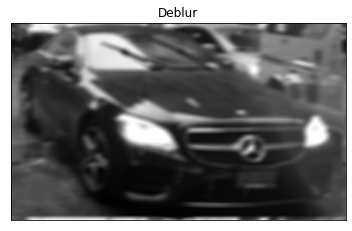

[[7.65852795 7.59793257 7.53890566 ... 8.33214744 8.09756993 7.87192375]
 [7.00815373 6.97018457 6.93394392 ... 7.64955751 7.42321756 7.20821325]
 [6.4554579  6.43710984 6.42094227 ... 7.06218096 6.8449736  6.64156791]
 ...
 [8.56714699 8.48291184 8.40042616 ... 9.16810011 8.96295827 8.76241054]
 [8.25456689 8.17780484 8.10280416 ... 8.88740984 8.67037955 8.45890756]
 [7.95053158 7.88153204 7.81427653 ... 8.60871383 8.38142323 8.16121654]]


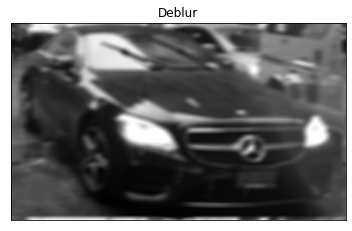

[[7.65852795 7.59793257 7.53890566 ... 8.33214744 8.09756993 7.87192375]
 [7.00815373 6.97018457 6.93394392 ... 7.64955751 7.42321756 7.20821325]
 [6.4554579  6.43710984 6.42094227 ... 7.06218096 6.8449736  6.64156791]
 ...
 [8.56714699 8.48291184 8.40042616 ... 9.16810011 8.96295827 8.76241054]
 [8.25456689 8.17780484 8.10280416 ... 8.88740984 8.67037955 8.45890756]
 [7.95053158 7.88153204 7.81427653 ... 8.60871383 8.38142323 8.16121654]]


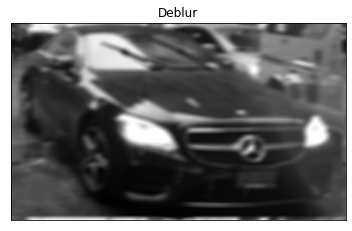

[[7.65852795 7.59793257 7.53890566 ... 8.33214744 8.09756993 7.87192375]
 [7.00815373 6.97018457 6.93394392 ... 7.64955751 7.42321756 7.20821325]
 [6.4554579  6.43710984 6.42094227 ... 7.06218096 6.8449736  6.64156791]
 ...
 [8.56714699 8.48291184 8.40042616 ... 9.16810011 8.96295827 8.76241054]
 [8.25456689 8.17780484 8.10280416 ... 8.88740984 8.67037955 8.45890756]
 [7.95053158 7.88153204 7.81427653 ... 8.60871383 8.38142323 8.16121654]]


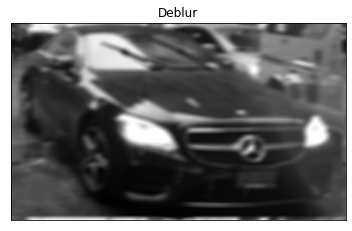

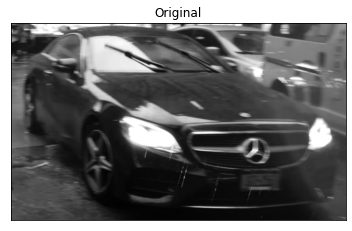

In [178]:
import scipy.fft


def wiener_filter(img, psf, K):
  psf = psf/np.sum(psf)
  dummy=np.copy(img) 
  dummy=scipy.fft.fft2(dummy)
  psf = scipy.fft.fft2(psf, s=img.shape)
  psf = np.conj(psf) / (np.abs(psf)**2+K)
  dummy = dummy*psf
  dummy= np.abs(scipy.fft.ifft2(dummy))
  print(dummy)
  return dummy
#psf = np.zeros((6, 6))
#psf = np.zeros((6, 6))
#psf = np.ones((6,6),np.uint8)
#for i in range(6):
  #psf[i,(i+1)%6]=0
#psf=psf*255/1530
#cv2_imshow(psf)
for i in range(10):
  tran1 =  wiener_filter(imgQ4, p, K=10) 
  plt.imshow(tran1, cmap='gray')
  plt.title('Deblur'), plt.xticks([]), plt.yticks([])
  plt.show()
plt.imshow(imgQ4, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()
#f(tran1)
  #img=tran1

# Question 5